### STUDENTS UNIVERSITY ADMISSION

### Importing important libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score as cs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier   
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('admission.csv')


### Qn1. a) Visualize the 10 random rows of the data set

In [3]:
sample=data.sample(10)
sample

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
351,352,325,110,4,3.5,4.0,8.67,1,0.73
58,59,300,99,1,3.0,2.0,6.80,1,0.36
364,365,313,102,3,3.5,4.0,8.90,1,0.77
253,254,335,115,4,4.5,4.5,9.68,1,0.93
342,343,308,106,3,3.0,3.0,8.24,0,0.58
424,425,325,114,5,4.0,5.0,9.46,1,0.91
341,342,326,110,3,3.5,3.5,8.76,1,0.79
56,57,316,102,3,2.0,3.0,7.40,0,0.64
456,457,299,100,2,2.0,2.0,7.88,0,0.51
150,151,334,114,4,4.0,4.0,9.43,1,0.93


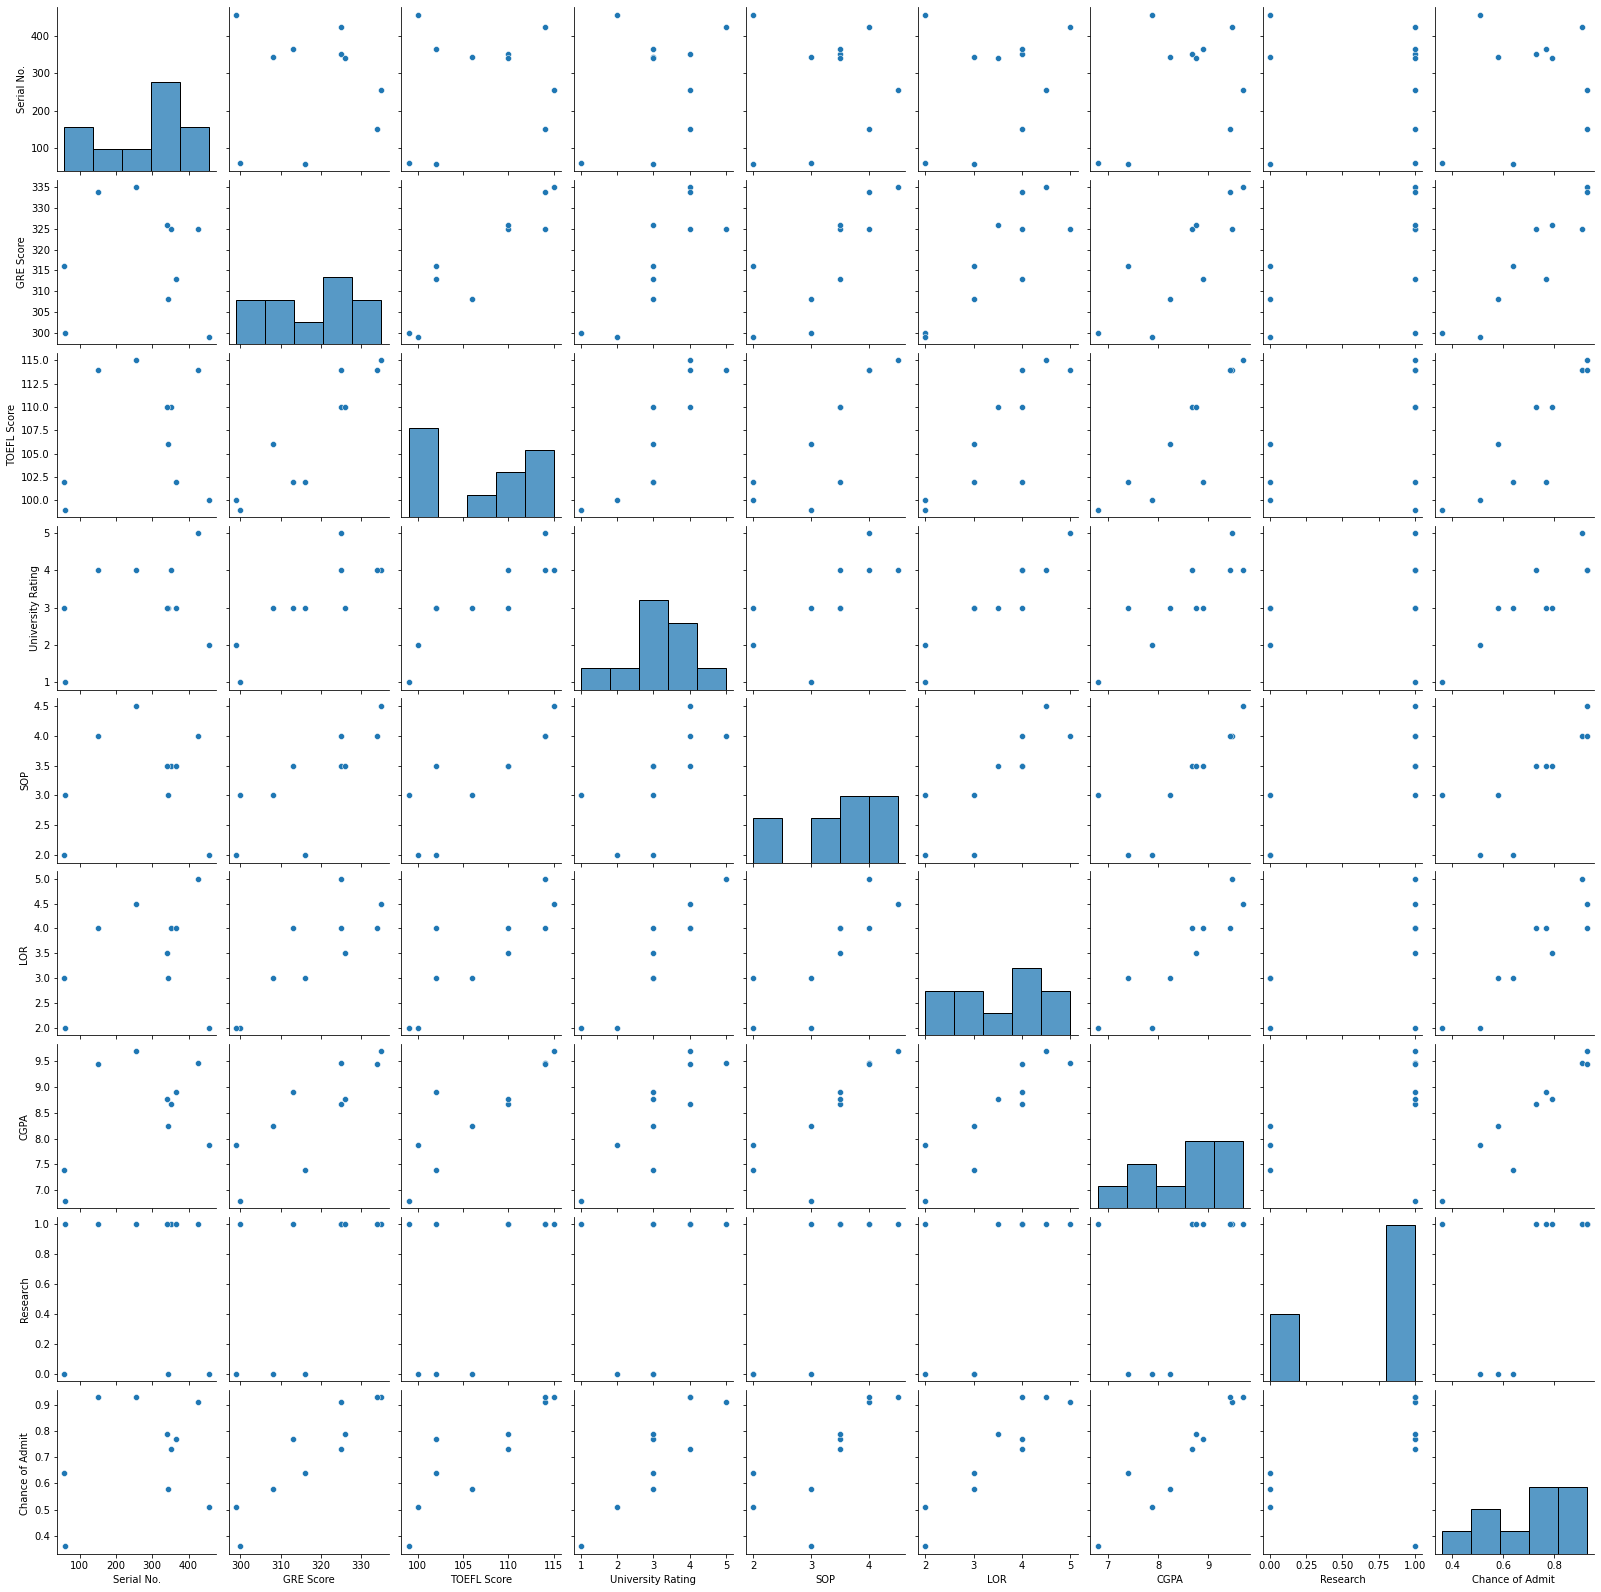

In [4]:
sns.pairplot(sample)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Qn1. c) Check the shape of the data set

In [7]:
print('The dataset has {} features and {} observations with zero null values.'.format(data.shape[1],data.shape[0]))


The dataset has 9 features and 500 observations with zero null values.


In [8]:
#Serial No. is a unique id column, we cannot get any insights from a unique id column, so we drop that column.
data.drop('Serial No.',axis=1,inplace=True)

In [9]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Qn1. d) Generate the correlation matrix

In [10]:
data.drop('Chance of Admit ',axis=1).corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


###### The correlation matrix shows there is a strong correlation between the independent variables except research. Research is less correlated with the other variables.

### Qn1. e) Generate a correlogram

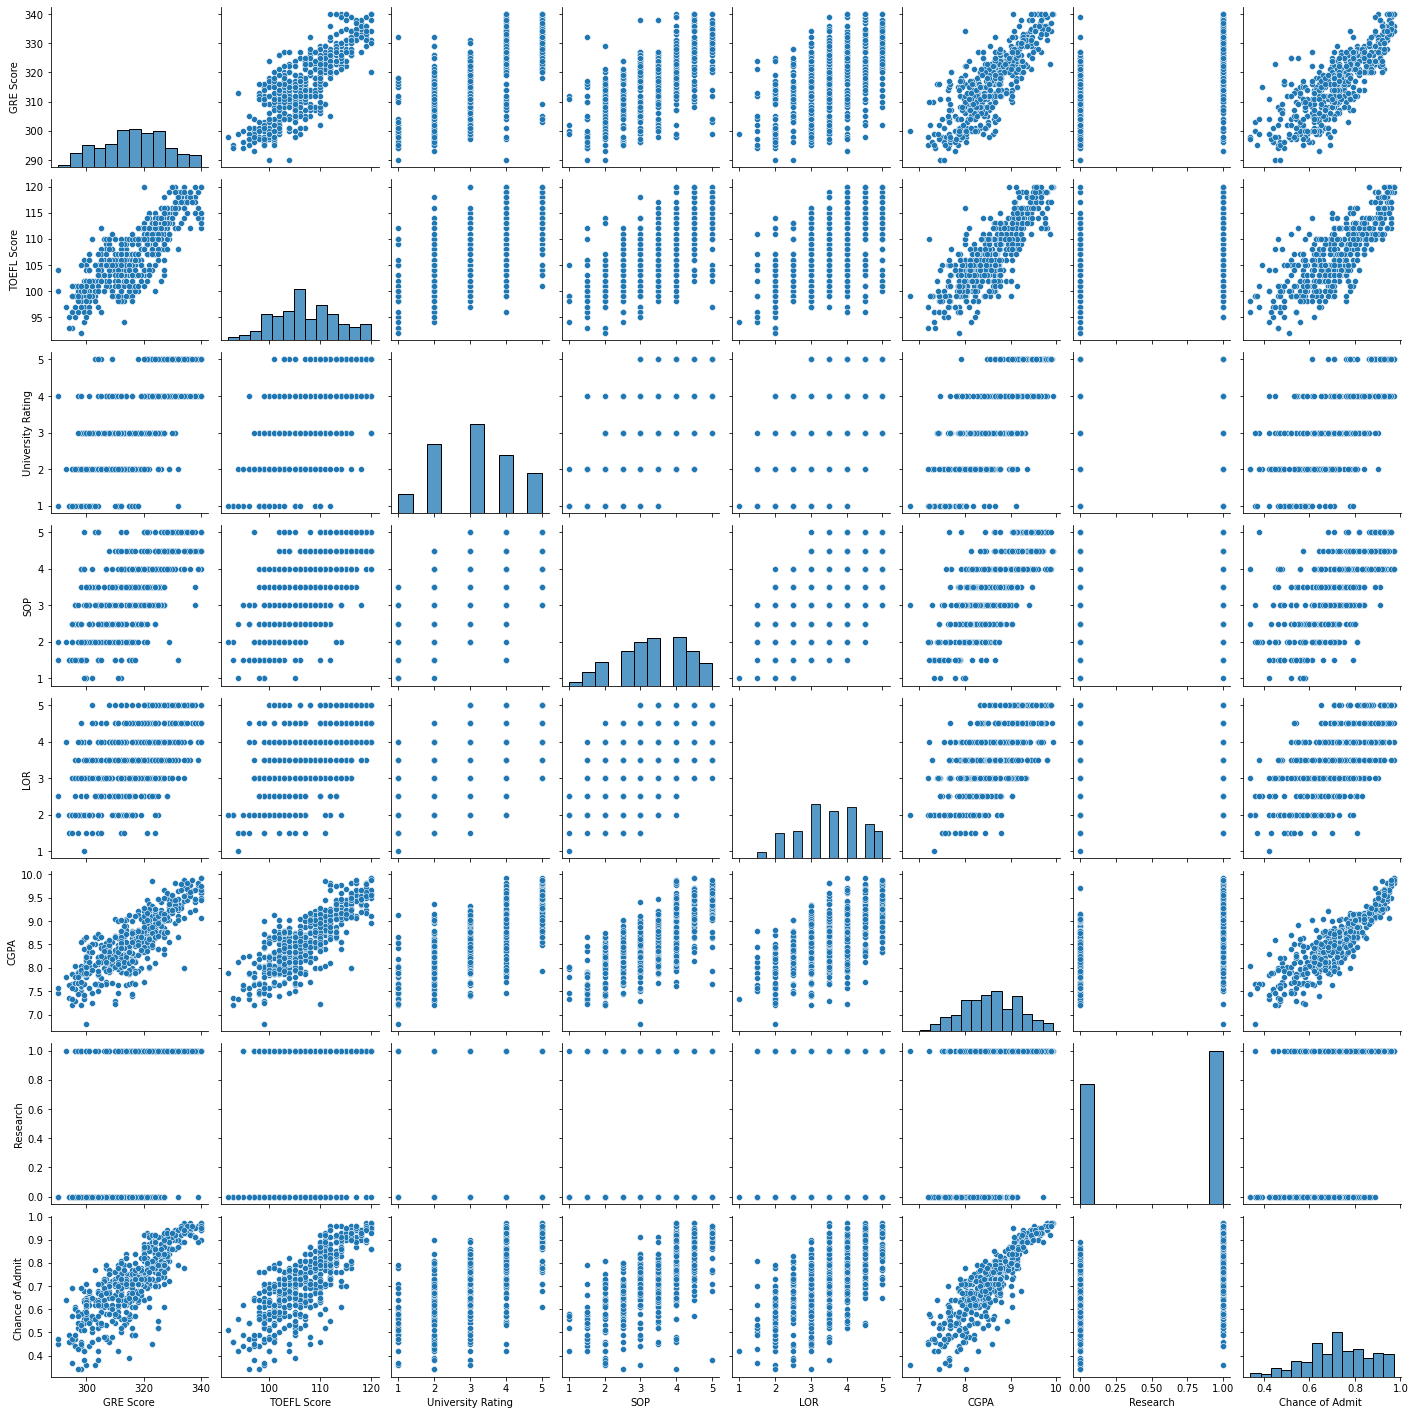

In [11]:
sns.pairplot(data)

- The diagonal plots of the correlogram shows the distribution of the numerical variables.
- The off- diagonal plots shows the correlation between the two variables.
- The plots having linearly spread datapoints from bottom-left to top-right shows that the two variables are varying linearly with each other.
- The plots with varies straight lines of datapoints indicates a categorical variables with that many classes in each variables.
- From the above plot we can observe that chance of admit is directly proportional to GRE Score, TOEFL Score and CGPA.

###  The plots which are linearly varing clearly shows:
- As the CGPA increases chances of admit increases.
- As the TOEFL Score increases chances of admit increases.
- As the GRE Score increases chances of admit increases.
- This shows that the students having higher CGPA,GRE Score,TOEFL Score have a higher chance of getting the admission despite the other features as the graph and the correlation matrix shows a strong positive correlation between these variables and the chance of admit. 

### Qn4. Convert the target variable “Chance of Admit” to 
categorical having values 0 and 1,such that :

Students having the “Chance of Admit” value > 0.80, are assigned 
value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned 
value 0

Where 0: Low chance of Admission and 1: High chance of 
admission


In [12]:
data['Chance of Admit ']= np.where(data['Chance of Admit '].values<=0.8,0,1)

In [13]:
df=data.copy()

### Type Casting

In [14]:
df[['SOP','LOR ','Research','University Rating','Chance of Admit ']]= df[['SOP','LOR ','Research','University Rating','Chance of Admit ']].astype('O')


### Splitting the dataset into categorical and numerical variables

In [15]:
cat= df.select_dtypes('object')
num = df.select_dtypes(exclude='object')
cat.shape,num.shape

((500, 5), (500, 3))

### Descriptive statistics of the dataset

### Qn1. b) Generate the description for numeric variables

In [16]:
num.describe()

,GRE Score,TOEFL Score,CGPA
count,500.000000,500.000000,500.000000
mean,316.472000,107.192000,8.576440
std,11.295148,6.081868,0.604813
min,290.000000,92.000000,6.800000
25%,308.000000,103.000000,8.127500
50%,317.000000,107.000000,8.560000
75%,325.000000,112.000000,9.040000
max,340.000000,120.000000,9.920000


NUMERICAL DISCRETE VARIABLES:

- GRE Score:
    - The maxmium score is 340 and the minimum score is 290.
    - On an average students have a GRE Score of 316.472.
- TOFEL Score:
    - Score to test the candidates’ English knowledge required to study, work, or migrate abroad.
    - The maxmium score is 120 and the minimum score is 103.
    - On an average students have a TOFEL Score of 107.192.

NUMERICAL CONTINUOUS VARIABLES:
- CGPA:
    - The maxmium CGPA is 9.92 and the minimum CGPA is 6.8.
    - On an average students have a CGPA of 8.576440.
    
    
    


In [17]:
df.describe(include='O')

,University Rating,SOP,LOR,Research,Chance of Admit
count,500,500.0,500.0,500,500
unique,5,9.0,9.0,2,2
top,3,4.0,3.0,1,0
freq,162,89.0,99.0,280,358


CATEGORICAL VARIABLE:
- University Rating:
    - 5 indicates the highest rating, 1 indicates the lowest rating.
    - The university is rated 3 the maximum number of times as it has the highest frequency of 162.
    - 5 is given the highest preference followed by 4,3,2 and 1 is given the least preference.
- SOP -Systematic Operation Procedure:
    - There are 9 classes.
    - Out of the 9 classes, class 4 has the highest frequency of 89.
- LOR -Letter Of Recommendation:
     - There are 9 classes.
    - Out of the 9 classes, class 3 has the highest frequency of 99.
- Research: 
    - There are two categories - 1 and 2.
    - Category 1 has the maximum count of 280 out of 500.
- Chance of admit:
    - There are two categories.
    - 0 : Low chance of Admission and 1: High chance of admission
    - Maximum number of students fall under the category of    chance of admission.
    - This variable is on ordinal scale as values > 0.80 are given '1' indicating students are given high chance of admission than '0' the students having their values < 0.80.
    - But the aim of the model is to predict whether a student has a high chance or a low chance of admission, hence, we give equal importance to both the classes of chance of admit.
    
     (The condition for building a model for categorical dependent variable is that the variable to be predicted should be on a nominal scale, so we take chance of admit on nominal scale).. 

### Splitting the dataset into Independent variables and Dependent Variable

In [44]:
idv=data.drop('Chance of Admit ',axis=1)
dv= data.loc[:,'Chance of Admit ']
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


### ANALYSIS

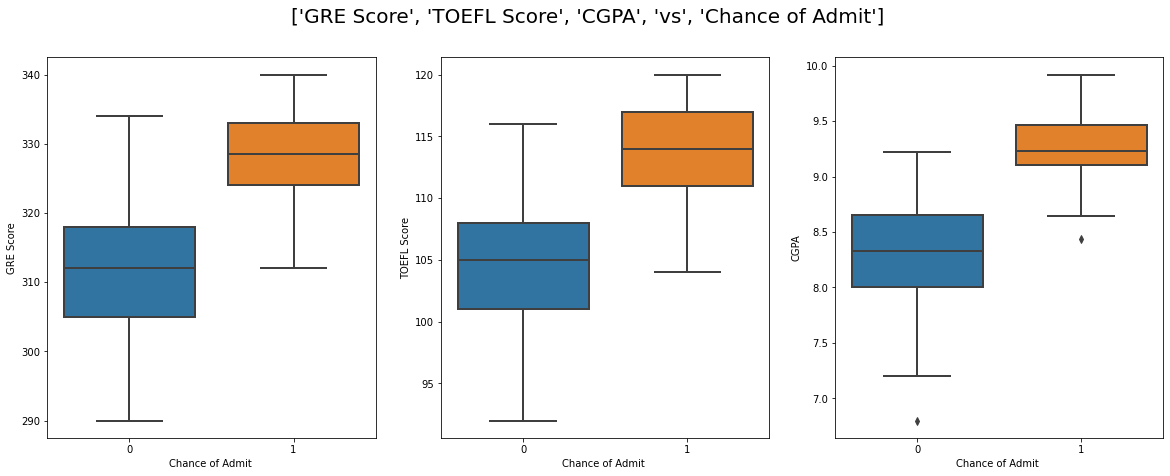

In [91]:
fig,ax= plt.subplots(1,3,figsize=[20,7])
plt.suptitle(['GRE Score', 'TOEFL Score','CGPA','vs','Chance of Admit'],fontsize=20)
sns.boxplot(data=data,x='Chance of Admit ',y='GRE Score',ax=ax[0],linewidth=2)
sns.boxplot(data=data,x='Chance of Admit ',y='TOEFL Score',ax=ax[1],linewidth=2)
sns.boxplot(data=data,x='Chance of Admit ',y='CGPA',ax=ax[2],linewidth=2)
plt.tight_layout
plt.show()

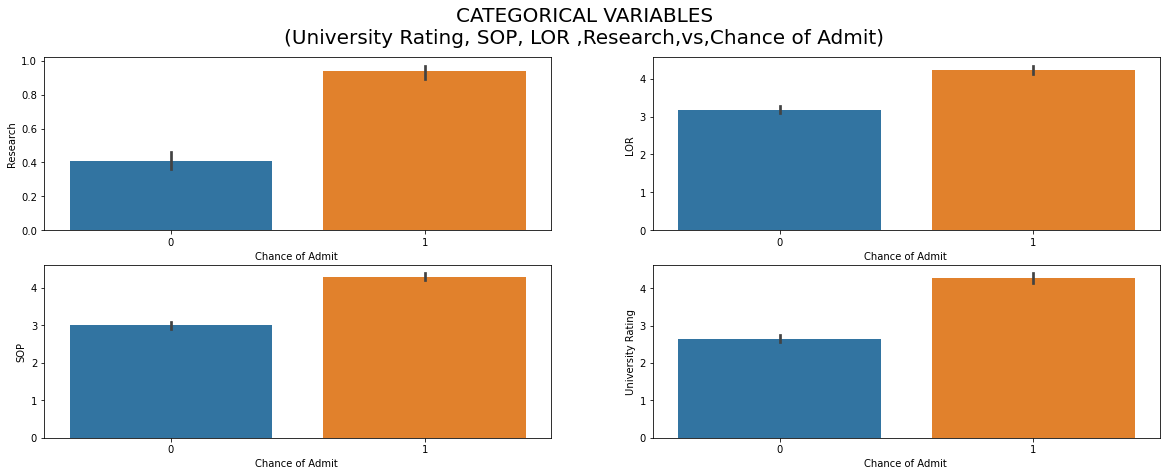

In [92]:
fig,ax= plt.subplots(2,2,figsize=[20,7])
plt.suptitle('CATEGORICAL VARIABLES\n(University Rating, SOP, LOR ,Research,vs,Chance of Admit)',fontsize=20)
sns.barplot(data=data,x='Chance of Admit ',y='Research',ax=ax[0,0],linewidth=2)
sns.barplot(data=data,x='Chance of Admit ',y='LOR ',ax=ax[0,1],linewidth=2)
sns.barplot(data=data,x='Chance of Admit ',y='SOP',ax=ax[1,0],linewidth=2)
sns.barplot(data=data,x='Chance of Admit ',y='University Rating',ax=ax[1,1],linewidth=2)

plt.tight_layout
plt.show()

- Distribution of CGPA

<AxesSubplot:xlabel='CGPA', ylabel='Density'>

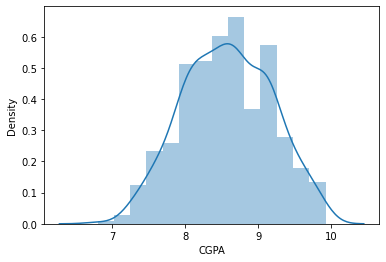

In [43]:
sns.distplot(df.CGPA,kde=True)

- The distribution of the continuous variable- CGPA is not a normal distribution.

#### Qn. Find the maximum and minimum values of GRE Score, TOEFL Score and CGEP

In [20]:
pd.DataFrame(df['TOEFL Score'].agg([max,min]))

,TOEFL Score
max,120
min,92


In [21]:
pd.DataFrame(df['CGPA'].agg([max,min]))

,CGPA
max,9.92
min,6.80


#### Qn.2 Find out the minimum and maximum values for GRE score


In [22]:
pd.DataFrame(df['GRE Score'].agg([max,min]))


,GRE Score
max,340
min,290


#### Qn3. Find out the percentage of universities for each university rating

(3    32.4
 2    25.2
 4    21.0
 5    14.6
 1     6.8
 Name: University Rating, dtype: float64,
 <AxesSubplot:ylabel='University Rating'>)

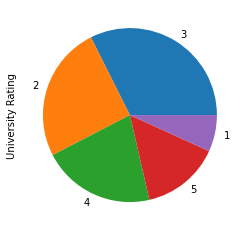

In [23]:
university=df['University Rating'].value_counts(normalize=True)*100
university,university.plot.pie()

### Qn. Find the count of universities  per the ratings?

,University Rating
3,162
2,126
4,105
5,73
1,34


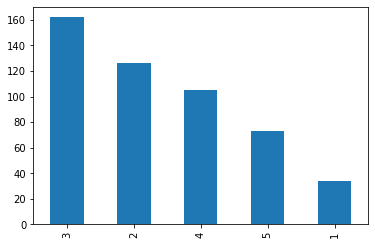

In [24]:
df['University Rating'].value_counts().plot.bar()
pd.DataFrame(df['University Rating'].value_counts())

### Qn. What is the percentage of students having a high chance of getting admission in their preferred university?

,Chance of Admit
0,358
1,142


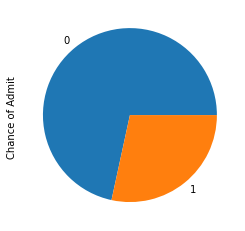

In [25]:
df['Chance of Admit '].value_counts().plot.pie()
pd.DataFrame(df['Chance of Admit '].value_counts())

In [26]:
pd.DataFrame(df['Chance of Admit '].value_counts(normalize =True)*100)

,Chance of Admit
0,71.6
1,28.4


- 28.4% students have a high chance of getting admission in their preferred university.
- 358 students which is 71.6% of the students have low chance of getting admission in their preferred university as their values lie below 0.80.

### Qn. Find the number students having high chance of getting admission into the universities of each rank.

In [27]:
pd.DataFrame(df.groupby(['Chance of Admit ','University Rating'])['Chance of Admit '].sum())


Chance of Admit 
Chance of Admit  University Rating                  
0                1                                 0
                 2                                 0
                 3                                 0
                 4                                 0
                 5                                 0
1                2                                 4
                 3                                16
                 4                                59
                 5                                63

<AxesSubplot:xlabel='Chance of Admit ', ylabel='count'>

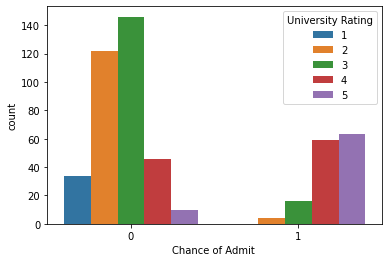

In [28]:
sns.countplot(data=df,x='Chance of Admit ',hue='University Rating')

###### Out of 500 students, 142 students only have a high chance of getting the admission.
- It can be observed that university with rating 1 is not preferred by the students.
- Number of students getting into the universities with ranking 2 is 4.
- Number of students getting into the universities with ranking 3 is 16.
- Number of students getting into the universities with ranking 4 is 59.
- Number of students getting into the universities with ranking 5 is 63.

- We can conclude that universities with higher ranking i.e.4 and 5, have fairly high number of openings for admissions.


### Qn. Is the rating of  LOR impacting the admission in the universites having higher rating? 

<AxesSubplot:xlabel='University Rating', ylabel='LOR '>

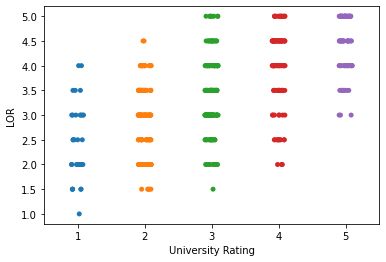

In [29]:
sns.stripplot(df['University Rating'],df['LOR '])

#### We can observe that the universities having high ratings requires the students to have high LOR ratings.

### Qn. What is the impact of LOR on admission? 

<AxesSubplot:xlabel='Chance of Admit ', ylabel='LOR '>

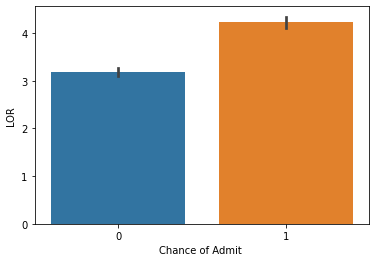

In [30]:
sns.barplot(df['Chance of Admit '],df['LOR '])

####  A good LOR creates a high chances of getting the admission.

### Qn. Is the rating of SOP impacting the admission in the universites having higher rating? 

<AxesSubplot:xlabel='University Rating', ylabel='SOP'>

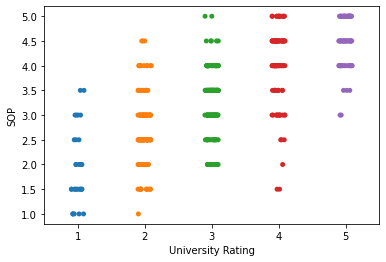

In [31]:
sns.stripplot(df['University Rating'],df['SOP'])

#### The rating of SOP influence the admission in universities having higher ratings.

### Qn. What is the impact of SOP on admission?

<AxesSubplot:xlabel='Chance of Admit ', ylabel='SOP'>

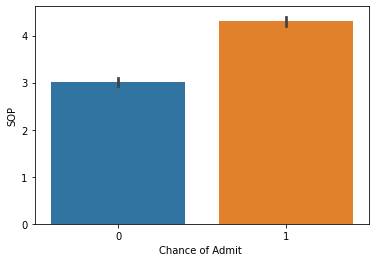

In [32]:
sns.barplot(df['Chance of Admit '],df['SOP'])

#### A good SOP creates a high chances of getting the admission.

### Qn.Does universities with high ratings require students to have a  portfolio of research based project to get the admission?
- assuming the feature research as the research projects taken up by the students, as many universities require students to submit their portfolio during the admission procedure.

<AxesSubplot:xlabel='University Rating', ylabel='count'>

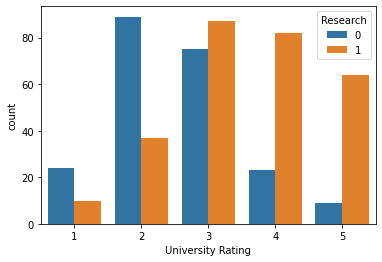

In [33]:
sns.countplot(data=df,x='University Rating',hue='Research')

##### Students are required to have a research portfolio for getting the admission in universities having high ratings.

### Qn. What is the average/minimum CGPA,TOEFL,GRE score that the students must have to have a high chances of the admissions in their preferred university?

In [34]:
pd.pivot_table(df,index=['Chance of Admit ','University Rating'], values=['GRE Score','TOEFL Score','CGPA'],aggfunc={min,np.mean})

CGPA         GRE Score         \
                                        mean   min        mean    min   
Chance of Admit  University Rating                                      
0                1                  7.798529  6.80  304.911765  290.0   
                 2                  8.154180  7.21  308.598361  293.0   
                 3                  8.443151  7.40  314.171233  297.0   
                 4                  8.515435  7.46  316.826087  290.0   
                 5                  8.642000  7.92  313.700000  303.0   
1                2                  8.897500  8.44  325.500000  320.0   
                 3                  9.020000  8.64  322.875000  312.0   
                 4                  9.265085  8.77  328.355932  314.0   
                 5                  9.379048  8.66  330.142857  320.0   

                                   TOEFL Score         
                                          mean    min  
Chance of Admit  University Rating                     
0                1                  100.205882   92.0  
                 2                  103.163934   94.0  
                 3                  105.726027   97.0  
                 4                  107.565217   96.0  
                 5                  106.000000  101.0  
1                2                  112.000000  107.0  
                 3                  111.687500  106.0  
                 4                  113.610169  104.0  
                 5                  114.619048  107.0

### Qn. Does the TOEFL AND GRE Score influence the admission of the students in their preferred universities?

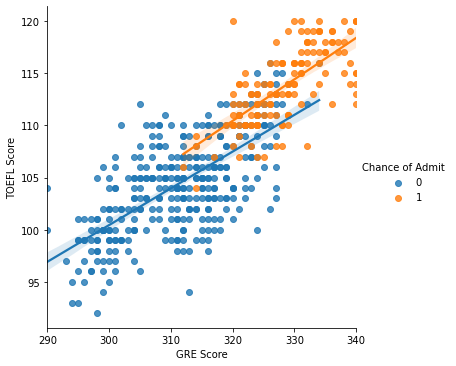

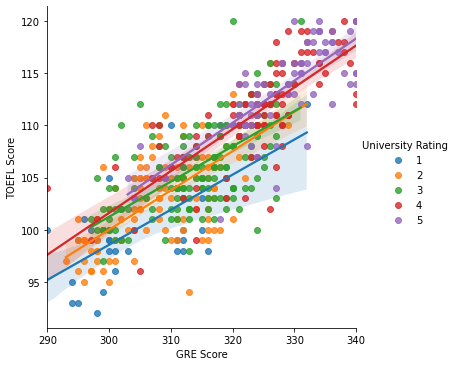

In [35]:
#fig = plt.subplots(1,2, figsize=(15,7))
sns.lmplot(x="GRE Score",data=df, y='TOEFL Score',hue='Chance of Admit ')
sns.lmplot(x='GRE Score',data=df,y='TOEFL Score',hue='University Rating')

 - Higher the student scores in GRE and TOEFL, more is the chance of getting admission in higher rated universties.

### Correlation Check between Numerical variables - Pearsonr Correlation

<AxesSubplot:>

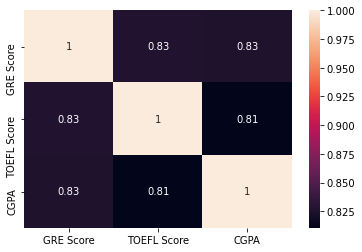

In [65]:
sns.heatmap(data.loc[:,['GRE Score', 'TOEFL Score','CGPA']].corr(),annot=True)

### Correlation Check between categorical variables - Spearman Rank Correlation

- Higher the correlation,stronger the dependency between the variables

<AxesSubplot:>

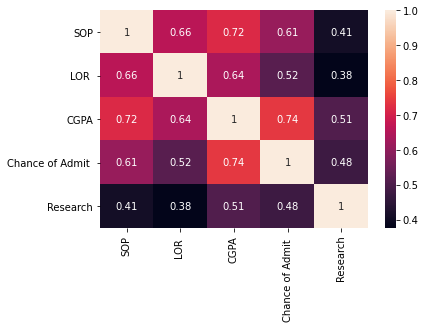

In [60]:
sns.heatmap(data.loc[:,['SOP', 'LOR ', 'CGPA','Chance of Admit ','Research']].corr(method='spearman'),annot=True)

## MODEL BUILDING

#### Prevelance Rate is the proportion of 0's and 1's in dependent variable in binary classification

In [ ]:
#Prevelance rate of the dataset
df['Chance of Admit '].value_counts(normalize=True)*100

###### The dataset is balanced, so accuracy_score is the preferred evaluation metric.

##### TRAIN-TEST-SPLIT

In [ ]:
x=data.drop('Chance of Admit ',axis=1)
y=data.loc[:,'Chance of Admit ']

In [ ]:
x.shape,y.shape

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=0,test_size=0.2,stratify=dv)

In [ ]:
print("Shape of X train:",xtrain.shape)
print("Shape of Y train:",ytrain.shape)
print("\nShape of X test:",xtest.shape)
print("Shape of Y test:",ytest.shape)

##### FEATURE SCALING

In [ ]:
scaler= MinMaxScaler()
xtrain=  scaler.fit_transform(xtrain)
xtest= scaler.transform(xtest)

### Feature Importance using Random Forest

In [ ]:
fea_imp=pd.DataFrame(data = RandomForestClassifier().fit(idv,dv).feature_importances_,index=idv.columns,columns=['FEATURE IMPORTANCE'])

fea_imp.sort_values(by='FEATURE IMPORTANCE',ascending=False)

In [ ]:
fea_imp.plot.bar()

## LOGISTIC REGRESSION MODEL

- Logistic Regression is a Classified Supervised ML algorithm, which is a parametric model. It assumes the dataset has no multicollinearity.
- To check for the multicollinearity between indepenent numerical variables we do variance inflation factor.

In [ ]:
#Multicollinearity Check
for i in range(len(num.columns)):
    print(f'{num.columns[i]}------->{variance_inflation_factor(num.values,i)}')

- There exists a multicollinearity in the dataset. 
- TOEFL Score have a higher vif value indicating that TOEFL Score can be explained better by GRE Score and CGPA, so we can drop TOFEL Score to have no multicollinearity.  

#### PREVELANCE RATE

In [ ]:
print('Prevelance rate of train data:\n',ytrain.value_counts(normalize=True)*100)
print('-'*50)
print('Prevelance rate of test data:\n',ytest.value_counts(normalize=True)*100)

In [ ]:
lr= LogisticRegression(max_iter=5000)


### Training the Model

In [ ]:
lr.fit(xtrain,ytrain)

### Testing the Model

In [ ]:
xtrainlr_pred= lr.predict(xtrain)
xtestlr_pred= lr.predict(xtest)

### Evaluation Metrics -Confusion matrix  

In [ ]:
print('Confusion Matrix of training data:\n' ,confusion_matrix(xtrainlr_pred,ytrain))
print('-'*50)
print('Confusion Matrix of validation data:\n' ,confusion_matrix(xtestlr_pred,ytest))

In [ ]:
print('Accuracy score of training data:\n',accuracy_score(xtrainlr_pred,ytrain))
print('-'*50)
print('Accuracy score of validation data:\n',accuracy_score(xtestlr_pred,ytest))

- Since this is a balanced dataset, preferred evalution metrics is accuracy_score which focuses on  maximum of true negatives(71) and true positives(22) and minimum of false positives(6) and false negatives(1).
- True negatives indicates less chances of students getting the admission.
- True positives indicates high chances of students getting the admission.
- The chances of students getting the admission is low as the true negative value is high when compared to true positive.

### Classification Report

In [ ]:
print('Classification Report of training data:\n' ,classification_report(xtrainlr_pred,ytrain))
print('-'*60)
print('Classification Report of validation data:\n' ,classification_report(xtestlr_pred,ytest))

- The accuracy of the train data is 94% and validation data is 93% which indicates the model is a generalised model having its train and validation accuracy more or less the same. 
- As the devependent variable classes are 0 and 1, threshold value fixed is 0.5.
- At 0.5 threshold value,the chances of students getting the admission is low.

### Qn5. Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model

## DECISION TREE CLASSIFIER 

In [ ]:
dt= DecisionTreeClassifier()

#### Training the Model

In [ ]:
dt.fit(xtrain,ytrain)

#### Testing the Model

In [ ]:
xtraindt_pred=dt.predict(xtrain)
xtestdt_pred=dt.predict(xtest)

### Evaluation Metrics - Confusion matrix  

In [ ]:
print('Confusion Matrix of training data:\n' ,confusion_matrix(xtraindt_pred,ytrain))
print('-'*50)
print('Confusion Matrix of validation Data:\n' ,confusion_matrix(xtestdt_pred,ytest))

- The true negatives and true positives are higher than the false negative and false positives, the model has a higher accuracy.
- The true negtaives are more than the true positives indicates that the students have a less chance of getting the admission.

###  Classification Report

In [ ]:
print('Classification Report of training data:\n' ,classification_report(xtraindt_pred,ytrain))
print('-'*50)
print('Classification Report of validation Data:\n' ,classification_report(xtestdt_pred,ytest))

##### The model is overfitted.The accuracy of the train data is 100% and accuracy of the validation data is 92%.
- To generalise the model, we need to do hyperparameter tuning.

### DECISION TREE CLASSIFIER- 1

In [ ]:
dt1= DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.3,min_samples_split =3)

In [ ]:
dt1.fit(xtrain,ytrain)

In [ ]:
xtraindt1_pred= dt1.predict(xtrain)
xtestdt1_pred= dt1.predict(xtest)

### Evaluation Metrics- Confusion Matrix

In [ ]:
print('Confusion Matrix of training data:\n' ,confusion_matrix(xtraindt1_pred,ytrain))
print('-'*50)
print('Confusion Matrix of validation data:\n' ,confusion_matrix(xtestdt1_pred,ytest))

- The true negatives and true positives are higher than the false negative and false positives, the model has a higher accuracy.
- The true negtaives are more than the true positives indicates that the students have a less chance of getting the admission.

### Classification Report

In [ ]:
print('Classification Reportof training data:\n' ,classification_report(xtraindt1_pred,ytrain))
print('-'*50)
print('Classification Report of validation data:\n' ,classification_report(xtestdt1_pred,ytest))

##### After changing the criterion to entropy, and adjusting the cost-complexity pruning alpha value and with the minmum sample split of 3 the model is generalised.  Train data has 93% of accuracy and validation data has accuracy of 90%.

###### qn5 ans.  
- According to Decision Tree,the students have a low chance of getting admission in their chosen university.
- As this is a balanced dataset and the evaluation metrics for a balanced dataset is accuracy.
- Accuracy focuses on True positive and True Negative. 
- The true negatives are more than the true positives, indicating low chance of getting the admission.

### Qn6. Build a Random Forest classifier, to predict whether a student has a low or high chance of admission to a chosen university

### RANDOM FOREST CLASSIFIER

In [ ]:
rf=RandomForestClassifier()

#### Training the Model

In [ ]:
rf.fit(xtrain,ytrain)

#### Testing the Model

In [ ]:
xtrainrf_pred=rf.predict(xtrain)
xtestrf_pred=rf.predict(xtest)


### Evaluation Metrics- Confusion Matrix

In [ ]:
print('Confusion Matrix of training data:\n' ,confusion_matrix(xtrainrf_pred,ytrain))
print('-'*50)
print('Confusion Matrix of validation data:\n' ,confusion_matrix(xtestrf_pred,ytest))

- True negatives indicates less chances of students getting the admission.
- True positives indicates high chances of students getting the admission.
- The chances of students getting the admission is low as the true negative value is high when compared to true positive.

In [ ]:
print('Classification Report of training data:\n' ,classification_report(xtrainrf_pred,ytrain))
print('-'*60)
print('Classification Report of validation data:\n' ,classification_report(xtestrf_pred,ytest))

- The model is overfitted as the train data accuracy is 100% and the validation data accuracy is 93%, the difference is greater than 5. To generalise the model, some hyperparameteric tuning is required. 

### RANDOM FOREST CLASSIFIER- 1

In [ ]:
rf1=RandomForestClassifier(n_estimators=98,min_samples_split=3,ccp_alpha=0.2)

#### Training the Model

In [ ]:
rf1.fit(xtrain,ytrain)

#### Testing the Model

In [ ]:
xtrainrf1_pred=rf1.predict(xtrain)
xtestrf1_pred=rf1.predict(xtest)

### Evaluation Metrics - Confusion Matrix

In [ ]:
print('Confusion Matrix of Training Data:\n' ,confusion_matrix(xtrainrf1_pred,ytrain))
print('-'*60)
print('Confusion Matrix of Validation Data:\n' ,confusion_matrix(xtestrf1_pred,ytest))


- True negatives indicates less chances of students getting the admission.
- True positives indicates high chances of students getting the admission.
- The chances of students getting the admission is low as the true negative value is high when compared to true positive.

### Classification Report


In [ ]:
print('Classification Report of Training Data:\n\n' ,classification_report(xtrainrf1_pred,ytrain))
print('-'*60)
print('Classification Report of Validation Data:\n\n' ,classification_report(xtestrf1_pred,ytest))


- After tuning the model with 3 min sample splits and adjusting the cost-complexity pruning alpha value, the model is now a generalised model with the accuracy of 90%.

### RANDOM FOREST CLASSIFIER- 2

In [ ]:
rf2=RandomForestClassifier(criterion='entropy',min_samples_split=3,ccp_alpha=0.4)

In [ ]:
rf2.fit(xtrain,ytrain)

In [ ]:
xtrainrf2_pred=rf2.predict(xtrain)
xtestrf2_pred=rf2.predict(xtest)

In [ ]:
print('Confusion Matrix of Training Data:\n' ,confusion_matrix(xtrainrf2_pred,ytrain))
print('-'*60)
print('Confusion Matrix of Validation Data:\n' ,confusion_matrix(xtestrf2_pred,ytest))


In [ ]:
print('Classification Report of Training Data:\n\n' ,classification_report(xtrainrf2_pred,ytrain))
print('-'*60)
print('Classification Report of Validation Data:\n\n' ,classification_report(xtestrf2_pred,ytest))


### RANDOM FOREST CLASSIFIER- 3

In [ ]:
rf3=RandomForestClassifier(n_estimators=150,criterion='gini',min_samples_split=3,ccp_alpha=0.3)

In [ ]:
rf3.fit(xtrain,ytrain)

In [ ]:
xtrainrf3_pred=rf3.predict(xtrain)
xtestrf3_pred=rf3.predict(xtest)

In [ ]:
print('Confusion Matrix of Training Data:\n' ,confusion_matrix(xtrainrf3_pred,ytrain))
print('-'*60)
print('Confusion Matrix of Validation Data:\n' ,confusion_matrix(xtestrf3_pred,ytest))


In [ ]:
print('Classification Report of Training Data:\n\n' ,classification_report(xtrainrf3_pred,ytrain))
print('-'*60)
print('Classification Report of Validation Data:\n\n' ,classification_report(xtestrf3_pred,ytest))


#### Qn6. ans
- As this is a balanced dataset and the evaluation metrics for a balanced dataset is accuracy.
- Accuracy focuses on True positive and True Negative. 
- Random Forest's confusion matrix shows a higher true negatives than the true positive.
- Therefore, the students have a low chance of getting admission in their chosen university.

### Qn7. Also use Ensemble Modelling techniques, to predict whether a student has a low or high chance of admission to a chosen university

### BAGGING CLASSIFIER

In [ ]:
bagging= BaggingClassifier()

In [ ]:
bagging.fit(xtrain,ytrain)

In [ ]:
xtrainb_pred= bagging.predict(xtrain)
xtestb_pred= bagging.predict(xtest)

In [ ]:
print('Confusion Matrix of Training Data:\n' ,confusion_matrix(xtrainb_pred,ytrain))
print('-'*60)
print('Confusion Matrix of Validation Data:\n' ,confusion_matrix(xtestb_pred,ytest))


In [ ]:
print('Classification Report of Training Data:\n\n' ,classification_report(xtrainb_pred,ytrain))
print('-'*60)
print('Classification Report of Validation Data:\n\n' ,classification_report(xtestb_pred,ytest))


##### The model is overfitted as the difference between the accuracy of train and validation is greater than 5. To generalise the model we can do hyperparametric tuning.

### BAGGING CLASSIFIER -1

In [ ]:
bagging1= BaggingClassifier(n_estimators=8,bootstrap =False,bootstrap_features=True,max_features=2)

In [ ]:
bagging1.fit(xtrain,ytrain)

In [ ]:
xtrainb1_pred= bagging1.predict(xtrain)
xtestb1_pred= bagging1.predict(xtest)

In [ ]:
print('Confusion Matrix of Training Data:\n' ,confusion_matrix(xtrainb1_pred,ytrain))
print('-'*60)
print('Confusion Matrix of Validation Data:\n' ,confusion_matrix(xtestb1_pred,ytest))


In [ ]:
print('Classification Report of Training Data:\n\n' ,classification_report(xtrainb1_pred,ytrain))
print('-'*60)
print('Classification Report of Validation Data:\n\n' ,classification_report(xtestb1_pred,ytest))


#### The model is overfitted as the difference between the accuracy of train and validation is greater than 5. To generalise the model we can do hyperparametric tuning.

### BAGGING CLASSIFIER -2

In [ ]:
bagging2= BaggingClassifier(n_estimators= 6 ,max_samples=2,max_features=4,bootstrap_features=True,bootstrap=True,oob_score=True)

In [ ]:
bagging2.fit(xtrain,ytrain)

In [ ]:
xtrainb2_pred= bagging1.predict(xtrain)
xtestb2_pred= bagging1.predict(xtest)

In [ ]:
print('Confusion Matrix of Training Data:\n' ,confusion_matrix(xtrainb2_pred,ytrain))
print('-'*60)
print('Confusion Matrix of Validation Data:\n' ,confusion_matrix(xtestb2_pred,ytest))


In [ ]:
print('Classification Report of Training Data:\n\n' ,classification_report(xtrainb2_pred,ytrain))
print('-'*60)
print('Classification Report of Validation Data:\n\n' ,classification_report(xtestb2_pred,ytest))


#### The model is overfitted as the difference between the accuracy of train and validation is greater than 5. To generalise the model we can do hyperparametric tuning.

### Bagging Classifier -3

Since research column is found to be less significant with the random forest feature importance, we drop the research column to generalise the model. 

In [ ]:
x1=x.drop('Research',axis=1)
y1=y
x1train,x1test,y1train,y1test= train_test_split(x1,y1,random_state=0,test_size=0.2,stratify=dv)

In [ ]:
x1train.shape,y1train.shape,x1test.shape,y1test.shape

In [ ]:
bagging3= BaggingClassifier(n_estimators= 12 ,max_samples=3,max_features=4,bootstrap_features=True,bootstrap=True,oob_score=True)

In [ ]:
bagging3.fit(x1train,y1train)

In [ ]:
xtrainb3_pred= bagging3.predict(x1train)
xtestb3_pred= bagging3.predict(x1test)

In [ ]:
print('Confusion Matrix of Training Data:\n' ,confusion_matrix(xtrainb3_pred,ytrain))
print('-'*60)
print('Confusion Matrix of Validation Data:\n' ,confusion_matrix(xtestb3_pred,ytest))


In [ ]:
print('Classification Report of Training Data:\n\n' ,classification_report(xtrainb3_pred,ytrain))
print('-'*60)
print('Classification Report of Validation Data:\n\n' ,classification_report(xtestb3_pred,ytest))


##### Qn7. ans
- As this is a balanced dataset and the evaluation metrics for a balanced dataset is accuracy.
- Accuracy focuses on True positive and True Negative. 
- As per Ensemble Modelling Technique- Bagging: 
- The students have a low chance of getting admission in their chosen university as the true negatives are higher than the true positives.

### Qn8. Compare all of the models and justify your choice about the optimum model

### Cross Valdidation of the models

In [ ]:
lrcs= cs(lr,xtrain,ytrain,cv=5)
dtcs= cs(dt,xtrain,ytrain,cv=5)
dt1cs=cs(dt1,xtrain,ytrain,cv=5)
rfcs= cs(rf,xtrain,ytrain,cv=5)
rf1cs= cs(rf1,xtrain,ytrain,cv=5)
rf2cs= cs(rf2,xtrain,ytrain,cv=5)
rf3cs=cs(rf3,xtrain,ytrain,cv=5)
bcs= cs(bagging,xtrain,ytrain,cv=5)
b1cs= cs(bagging1,xtrain,ytrain,cv=5)
b2cs= cs(bagging2,xtrain,ytrain,cv=5)
b3cs= cs(bagging3,x1train,y1train,cv=5)


In [ ]:
Cross_val={'Logistics ':lrcs,'Decision Tree':dtcs,'Decision Tree1':dt1cs,'Random Forest':rfcs,'Random Forest1':rf1cs,'Random Forest2':rf2cs,'Random Forest3':rf3cs,'Bagging':bcs,'Bagging1':b1cs,'Bagging2':b2cs,'Bagging3':b3cs}
Cross_val=pd.DataFrame(Cross_val)
Cross_val

In [ ]:
crossval=pd.DataFrame({'MODELS':['Logistics ','Decision Tree','Decision Tree1','Random Forest','Random Forest1','Random Forest2','Random Forest3','Bagging','Bagging1','Bagging2','Bagging3'],'CROSS VAL SCORE':[lrcs.mean(),dtcs.mean(),dt1cs.mean(),rfcs.mean(),rf1cs.mean(),rf2cs.mean(),rf3cs.mean(),bcs.mean(),b1cs.mean(),b2cs.mean(),b3cs.mean()]})
crossval.sort_values(by='CROSS VAL SCORE',ascending=False)

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(data=Cross_val)
plt.show()

#### Logistic Regression and Random Forest models have the least variance but Random Forest model has an outlier, so we can conclude that Logistic Regression is the most accurate and the most stabilized model to predict the chances of students getting admission in university.

## The aim is to find the best model by confusion matrix(evaluation metrics) with the highest True negative and True Positive. And accuracy_score focuses on True negatives and True positives.

In [ ]:
Accuracy= pd.DataFrame({'MODELS':['Logistics ','Decision Tree','Decision Tree1','Random Forest','Random Forest1','Random Forest2','Random Forest3','Bagging','Bagging1','Bagging2','Bagging3'],'ACCURACY':[accuracy_score(xtestlr_pred,ytest),accuracy_score(xtestdt_pred,ytest),accuracy_score(xtestdt1_pred,ytest),accuracy_score(xtestrf_pred,ytest),accuracy_score(xtestrf1_pred,ytest),accuracy_score(xtestrf2_pred,ytest),accuracy_score(xtestrf3_pred,ytest),accuracy_score(xtestb_pred,ytest),accuracy_score(xtestb1_pred,ytest),accuracy_score(xtestb2_pred,ytest),accuracy_score(xtestb3_pred,y1test)]})
Accuracy.sort_values(by='ACCURACY',ascending=False)

- Logistic Regression and Random Forest are the most optimised models for predicting the chance of students getting the admission in their chosen university.
- But the stability of logistic regression is slightly more than the random forest model, so the optimised model for predicting the students admission chance is Logistic Regression.